In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import csv, sqlite3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb  # Import the XGBoost library
from sklearn.pipeline import Pipeline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Suppress specific warnings or all warnings
warnings.filterwarnings('ignore')

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# House Pricing Dataset - PIPELINE Excercise

## Remark

This analysis is redone as for "House Pricing Dataset", but encouraging Pipelines and ML project approach given in Aurelion Geron "..." book. 


## Overview
Title: House Prices: Advanced Regression Techniques
Source: Kaggle House Prices Dataset
Goal: Predict the sale prices of houses based on various features.
Description: 
The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This dataset is often used to explore advanced regression techniques, feature engineering, and model evaluation.

## Files
* train.csv: The training dataset with features and the target variable (SalePrice).
* test.csv: The test dataset with features only, used for making predictions.
* data_description.txt: Detailed description of each feature in the dataset.
* sample_submission.csv: A sample submission file in the correct format.

## Key Features

The dataset includes numerous features describing the properties. Here is a summary of some key features:

<div style="display: flex;">

<div style="flex: 1; padding: 10px;">
    
| Feature            | Description                                                   |
|--------------------|---------------------------------------------------------------|
| `Id`               | Unique identifier for each property                           |
| `MSSubClass`       | The building class                                            |
| `MSZoning`         | The general zoning classification                             |
| `LotFrontage`      | Linear feet of street connected to the property               |
| `LotArea`          | Lot size in square feet                                       |
| `Street`           | Type of road access to the property                           |
| `Alley`            | Type of alley access to the property                          |
| `LotShape`         | General shape of property                                     |
| `LandContour`      | Flatness of the property                                      |
| `Utilities`        | Type of utilities available                                   |
| `LotConfig`        | Lot configuration                                             |
| `LandSlope`        | Slope of property                                             |
| `Neighborhood`     | Physical locations within Ames city limits                    |
| `Condition1`       | Proximity to main road or railroad                            |
| `Condition2`       | Proximity to main road or railroad (if a second is present)   |
| `BldgType`         | Type of dwelling                                             |
| `HouseStyle`       | Style of dwelling                                             |
| `OverallQual`      | Overall material and finish quality                           |
| `OverallCond`      | Overall condition rating                                      |
| `YearBuilt`        | Original construction date                                    |
| `YearRemodAdd`     | Remodel date                                                  |
| `RoofStyle`        | Type of roof                                                  |
| `RoofMatl`         | Roof material                                                 |
| `Exterior1st`      | Exterior covering on house                                    |
| `Exterior2nd`      | Exterior covering on house (if more than one material)        |
| `MasVnrType`       | Masonry veneer type                                           |
| `MasVnrArea`       | Masonry veneer area in square feet                            |
| `ExterQual`        | Exterior material quality                                     |
| `ExterCond`        | Present condition of the material on the exterior             |
| `Foundation`       | Type of foundation                                            |
| `BsmtQual`         | Height of the basement                                       |
| `BsmtCond`         | General condition of the basement                             |
| `BsmtExposure`     | Walkout or garden level basement walls                        |
| `BsmtFinType1`     | Quality of basement finished area                             |
| `BsmtFinSF1`       | Type 1 finished square feet                                   |
| `BsmtFinType2`     | Quality of second finished area (if present)                  |
| `BsmtFinSF2`       | Type 2 finished square feet                                   |
| `BsmtUnfSF`        | Unfinished square feet of basement                            |
| `TotalBsmtSF`      | Total square feet of basement area                            |
</div>

<div style="flex: 1; padding: 10px;">

| Feature            | Description                                                   |
|--------------------|---------------------------------------------------------------|
| `Heating`          | Type of heating                                               |
| `HeatingQC`        | Heating quality and condition                                 |
| `CentralAir`       | Central air conditioning (Y/N)                                |
| `Electrical`       | Electrical system                                             |
| `1stFlrSF`         | First-floor square feet                                       |
| `2ndFlrSF`         | Second-floor square feet                                      |
| `LowQualFinSF`     | Low-quality finished square feet (all floors)                 |
| `GrLivArea`        | Above grade (ground) living area square feet                  |
| `BsmtFullBath`     | Basement full bathrooms                                       |
| `BsmtHalfBath`     | Basement half bathrooms                                       |
| `FullBath`         | Full bathrooms above grade                                    |
| `HalfBath`         | Half baths above grade                                        |
| `BedroomAbvGr`     | Number of bedrooms above basement level                       |
| `KitchenAbvGr`     | Number of kitchens                                            |
| `KitchenQual`      | Kitchen quality                                               |
| `TotRmsAbvGrd`     | Total rooms above grade (does not include bathrooms)          |
| `Functional`       | Home functionality rating                                     |
| `Fireplaces`       | Number of fireplaces                                          |
| `FireplaceQu`      | Fireplace quality                                             |
| `GarageType`       | Garage location                                               |
| `GarageYrBlt`      | Year garage was built                                         |
| `GarageFinish`     | Interior finish of the garage                                 |
| `GarageCars`       | Size of garage in car capacity                                |
| `GarageArea`       | Size of garage in square feet                                 |
| `GarageQual`       | Garage quality                                                |
| `GarageCond`       | Garage condition                                              |
| `PavedDrive`       | Paved driveway (Y/N)                                          |
| `WoodDeckSF`       | Wood deck area in square feet                                 |
| `OpenPorchSF`      | Open porch area in square feet                                |
| `EnclosedPorch`    | Enclosed porch area in square feet                            |
| `3SsnPorch`        | Three-season porch area in square feet                        |
| `ScreenPorch`      | Screen porch area in square feet                              |
| `PoolArea`         | Pool area in square feet                                      |
| `PoolQC`           | Pool quality                                                  |
| `Fence`            | Fence quality                                                 |
| `MiscFeature`      | Miscellaneous feature not covered in other categories         |
| `MiscVal`          | Value of miscellaneous feature                                |
| `MoSold`           | Month sold                                                    |
| `YrSold`           | Year sold                                                     |
| `SaleType`         | Type of sale                                                  |
| `SaleCondition`    | Condition of sale                                             |
| `SalePrice`        | Sale price of the property                                    |

</div>
    
</div>
This dataset is great for practicing data preprocessing, feature engineering, and building regression models. You can find the dataset and more details on the Kaggle competition page: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).


## Get data

In [2]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import rbf_kernel

In [3]:
# Load datasets
#train_data = pd.read_csv("C:/Users/dasgu/Downloads/train.csv")
#test_data = pd.read_csv("C:/Users/dasgu/Downloads/test.csv")
housing_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
housing_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


## Take a Quick Look at the Data Structure

In [4]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Wybieramy kolumny typu object
object_columns = housing_train.select_dtypes(include=['object'])

# Iterujemy przez kolumny i liczymy unikalne wartości
unique_values_count = {col: housing_train[col].nunique() for col in object_columns.columns}

# Wyświetlamy wynik
for col, count in unique_values_count.items():
    print(f"Column '{col}'has {count} uniqe values.")

Column 'MSZoning'has 5 uniqe values.
Column 'Street'has 2 uniqe values.
Column 'Alley'has 2 uniqe values.
Column 'LotShape'has 4 uniqe values.
Column 'LandContour'has 4 uniqe values.
Column 'Utilities'has 2 uniqe values.
Column 'LotConfig'has 5 uniqe values.
Column 'LandSlope'has 3 uniqe values.
Column 'Neighborhood'has 25 uniqe values.
Column 'Condition1'has 9 uniqe values.
Column 'Condition2'has 8 uniqe values.
Column 'BldgType'has 5 uniqe values.
Column 'HouseStyle'has 8 uniqe values.
Column 'RoofStyle'has 6 uniqe values.
Column 'RoofMatl'has 8 uniqe values.
Column 'Exterior1st'has 15 uniqe values.
Column 'Exterior2nd'has 16 uniqe values.
Column 'MasVnrType'has 3 uniqe values.
Column 'ExterQual'has 4 uniqe values.
Column 'ExterCond'has 5 uniqe values.
Column 'Foundation'has 6 uniqe values.
Column 'BsmtQual'has 4 uniqe values.
Column 'BsmtCond'has 4 uniqe values.
Column 'BsmtExposure'has 4 uniqe values.
Column 'BsmtFinType1'has 6 uniqe values.
Column 'BsmtFinType2'has 6 uniqe values.

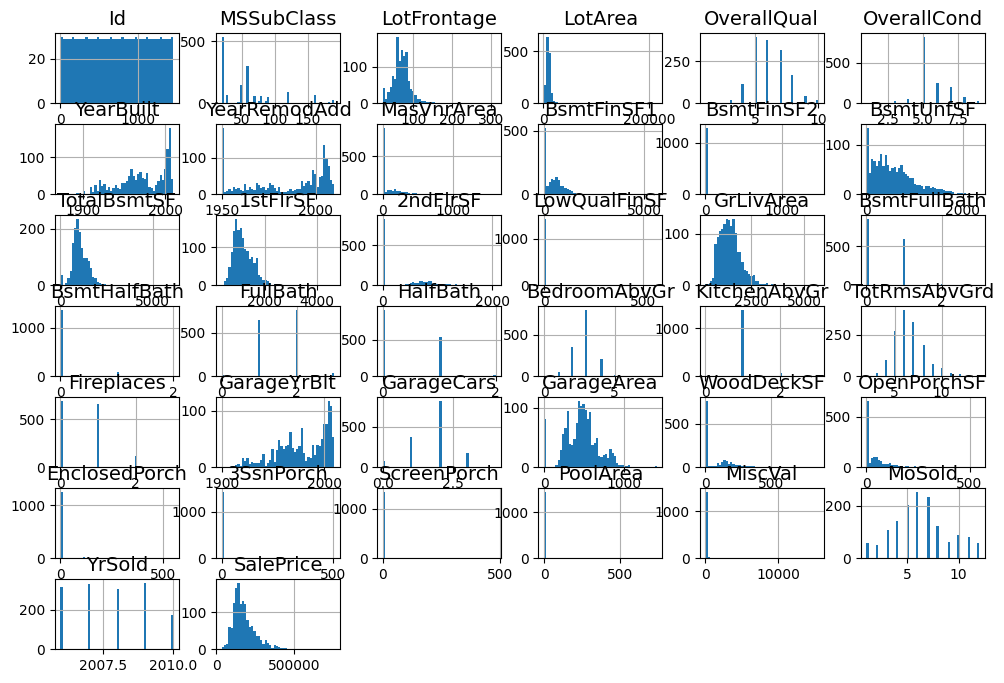

In [7]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_train.hist(bins=50, figsize=(12, 8))
plt.show()

In [8]:
corr_matrix = housing_train.corr(numeric_only=True)
# Wyświetl macierz korelacji
#plt.figure(figsize=(24, 16))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Macierz korelacji')
#plt.show()

In [9]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

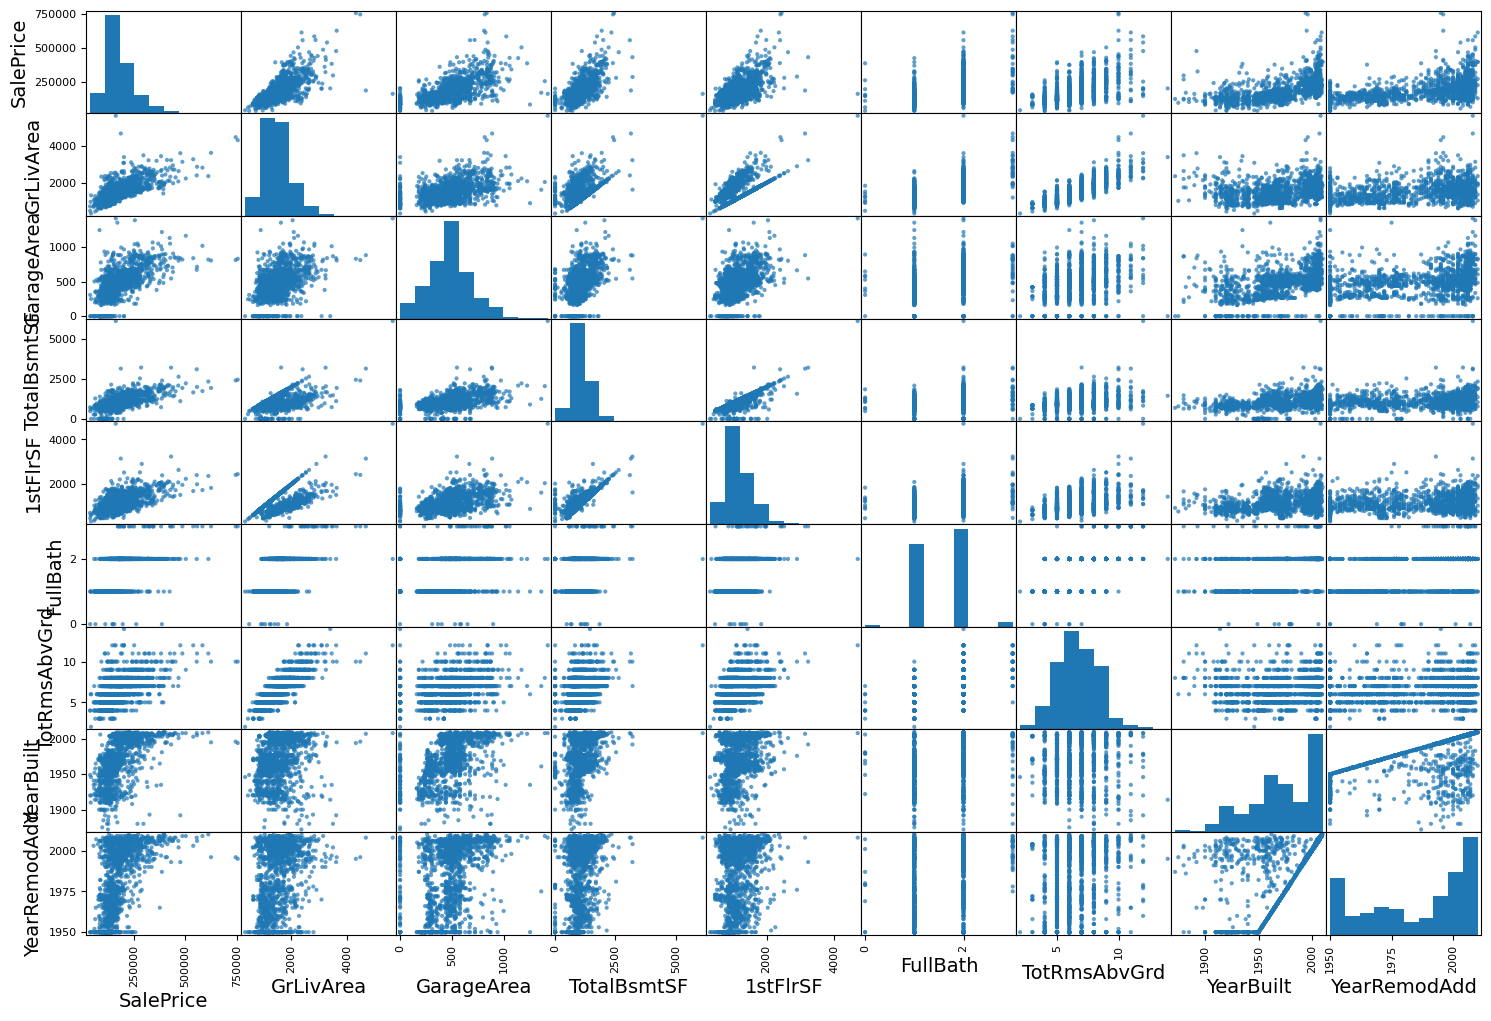

In [10]:
from pandas.plotting import scatter_matrix

# Wybierz tylko zmienne numeryczne
numeric_cols = housing_train.select_dtypes(include=['number'])

# Lista atrybutów, które chcesz uwzględnić
attributes = ["SalePrice", 'GrLivArea', "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]

# Upewnij się, że wszystkie atrybuty znajdują się w zbiorze danych
attributes = [attr for attr in attributes if attr in numeric_cols.columns]

# Generuj scatter matrix z wybranymi atrybutami
scatter_matrix(housing_train[attributes], figsize=(18, 12), alpha=0.7, diagonal='hist')
plt.show()

## Prepare pipelines and Prepare Data

In [11]:
# Adding additional features
luxury_features = ["PoolArea", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]

def add_luxury_addon(df):
    df['LuxAddon'] = df[luxury_features].apply(
        lambda row: 1 if any((row > 0) & (~row.isna())) else 0, axis=1
    )
    return df

housing_train = add_luxury_addon(housing_train)
housing_test = add_luxury_addon(housing_test)

In [12]:
# Define features and target variable
X_features = ["OverallQual", "GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", 
              "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "GarageYrBlt", 
              "MasVnrArea", "BsmtFinSF1", "LotFrontage", "LuxAddon", "HalfBath", 
              "KitchenAbvGr", "MSZoning", "Condition1", "BldgType", "Electrical", 
              "Neighborhood", "SaleCondition", "ExterQual", "BsmtQual", 
              "HeatingQC", "KitchenQual", "Functional"]

y_target = "SalePrice"

# Keep only the specified columns
housing_train = housing_train[X_features + [y_target]]
housing_test = housing_test[X_features]

In [13]:
# Define a custom transformer for feature engineering
class FeatureAdder(BaseEstimator, TransformerMixin):
    print(f"FeatureAdder")

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Sprawdź typ i kształt danych
        print(f"Type of X: {type(X)}")
        print(f"Shape of X: {X.shape}")

        X_copy = X.copy()
        X_copy["Area_per_piece"] = X_copy["GrLivArea"] / (X_copy["TotRmsAbvGrd"] + X_copy["FullBath"] + X_copy["HalfBath"] + X_copy["KitchenAbvGr"])
        X_copy["Rooms_per_bathroom"] = X_copy["TotRmsAbvGrd"] / (X_copy["FullBath"] + X_copy["HalfBath"])
        print(f"Type of X_copy (FeatureAdder return): {type(X_copy)}")
        print(f"Shape of X_copy (FeatureAdder return): {X_copy.shape}")

        return X_copy

FeatureAdder


In [14]:
class RBFTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Upewnij się, że X jest DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Expected X to be a DataFrame")
        
        # Upewnij się, że kolumny są dostępne
        if 'YearBuilt' not in X.columns or 'GarageArea' not in X.columns:
            raise KeyError("Expected columns 'YearBuilt' and 'GarageArea' are not in the DataFrame.")

        # Sprawdzenie i przetwarzanie danych
        ages = X["YearBuilt"].values.reshape(-1, 1)
        garage_area = X["GarageArea"].values.reshape(-1, 1)

        rbf_year = rbf_kernel(ages, [[1.1]], gamma=10)
        rbf_area = rbf_kernel(garage_area, [[0.1]], gamma=5)

        rbf_features = pd.DataFrame({
            'RBF_Kernel_YearBuilt': rbf_year.flatten(),
            'RBF_Kernel_GarageArea': rbf_area.flatten()
        }, index=X.index)

        # Łączenie nowych cech z oryginalnym DataFrame
        df = pd.concat([X, rbf_features], axis=1)
        print(f"Type of df (RBFTransformer return): {type(df)}")
        print(f"Shape of df (RBFTransformer return): {df.shape}")

        return df

In [15]:
# Define a custom transformer for outlier removal
class OutlierRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.isolation_forest = IsolationForest(random_state=42)
        self.isolation_forest.fit(X)
        return self

    def transform(self, X):
        outlier_mask = self.isolation_forest.predict(X) == 1
        return X[outlier_mask]

In [16]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class NaNToNoneTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
       # Sprawdź typ i kształt danych
        print(f"Type of X (NaNToNoneTransformer in) {type(X)}")
        print(f"Shape of X (NaNToNoneTransformer in): {X.shape}")

        # Replace NaN with None using Pandas
        df = X.where(~pd.isna(X), None)
        print(f"(NanToNon return) Type of X: {type(df)}")
        print(f"(NanToNon return) Shape of X: {df.shape}")
        return X.where(~pd.isna(X), None)

    def get_feature_names_out(self, input_features=None):

        print(f"(NanToNon return) Type of X: {type(input_features)}")
        print(f"(NanToNon return) Shape of X: {input_features.shape}")
        return input_features

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class DebugTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print("Transformed DataFrame:")
        print(X.columns)
        return X

In [18]:
class NumpyToDataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns  # Oczekiwane kolumny

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Upewnij się, że X jest numpy.ndarray
        if not isinstance(X, np.ndarray):
            raise ValueError("Expected input to be a numpy.ndarray")

        # Konwersja do DataFrame
        return pd.DataFrame(X, columns=self.columns)

In [19]:
# Identify numeric and categorical columns
numeric_cols = housing_train.select_dtypes(include=[np.number]).columns.tolist()
object_cols = housing_train.select_dtypes(include=['object']).columns.tolist()

# Define columns for one-hot and ordinal encoding
onehot_columns = ["MSZoning", "Condition1", "BldgType", "Electrical", "Neighborhood", "SaleCondition"]
ordinal_columns = ["ExterQual", "BsmtQual", "HeatingQC", "KitchenQual", "Functional"]


In [20]:
# Create numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ('nan_to_none', NaNToNoneTransformer()),  # Convert NaN to None
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create ordinal pipeline with SimpleImputer and StandardScaler
ordinal_pipeline = Pipeline(steps=[
    ('nan_to_none', NaNToNoneTransformer()),  # Convert NaN to None
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler()),
])# Konwersja na DataFrame


# Create ordinal pipeline with SimpleImputer and StandardScaler
onehot_pipeline = Pipeline(steps=[
    ('nan_to_none', NaNToNoneTransformer()),  # Convert NaN to None
    ('onehot', OneHotEncoder(sparse=False, drop='first')),

])# K

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('onehot', onehot_pipeline, onehot_columns),
        ('ordinal', ordinal_pipeline, ordinal_columns)
    ],
    remainder='drop'  # Adjust this as needed
)

# Update your pipelines
pipeline = Pipeline(steps=[
    ('feature_adder', FeatureAdder()),
    #('debug1', DebugTransformer()), 
    ('preprocessor', preprocessor),  # Move preprocessor before RBF transformer
    #('rbf_transformer', RBFTransformer()), # dosnt work so commented
    #('debug2', DebugTransformer())
])


In [21]:
# Fit the pipeline and transform data
X_train_filtered = pipeline.fit_transform(housing_train)

# Extract target variable
y_train = housing_train[y_target].values


Type of X: <class 'pandas.core.frame.DataFrame'>
Shape of X: (1460, 28)
Type of X_copy (FeatureAdder return): <class 'pandas.core.frame.DataFrame'>
Shape of X_copy (FeatureAdder return): (1460, 30)
Type of X (NaNToNoneTransformer in) <class 'pandas.core.frame.DataFrame'>
Shape of X (NaNToNoneTransformer in): (1460, 17)
(NanToNon return) Type of X: <class 'pandas.core.frame.DataFrame'>
(NanToNon return) Shape of X: (1460, 17)
Type of X (NaNToNoneTransformer in) <class 'pandas.core.frame.DataFrame'>
Shape of X (NaNToNoneTransformer in): (1460, 6)
(NanToNon return) Type of X: <class 'pandas.core.frame.DataFrame'>
(NanToNon return) Shape of X: (1460, 6)
Type of X (NaNToNoneTransformer in) <class 'pandas.core.frame.DataFrame'>
Shape of X (NaNToNoneTransformer in): (1460, 5)
(NanToNon return) Type of X: <class 'pandas.core.frame.DataFrame'>
(NanToNon return) Shape of X: (1460, 5)


In [22]:
# Transform the test data using the pre-fitted pipeline
#X_test_filtered = pipeline.transform(housing_test)

In [23]:
# Convert processed data back to a DataFrame (especially useful after transformations like OneHotEncoder)
housing_train_processed_df = pd.DataFrame(X_train_filtered, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
housing_train_processed_df.head()

(NanToNon return) Type of X: <class 'numpy.ndarray'>
(NanToNon return) Shape of X: (17,)
(NanToNon return) Type of X: <class 'numpy.ndarray'>
(NanToNon return) Shape of X: (6,)
(NanToNon return) Type of X: <class 'numpy.ndarray'>
(NanToNon return) Shape of X: (5,)


,num__OverallQual,num__GrLivArea,num__GarageArea,num__TotalBsmtSF,num__1stFlrSF,num__FullBath,num__TotRmsAbvGrd,num__YearBuilt,num__YearRemodAdd,num__GarageYrBlt,...,onehot__SaleCondition_AdjLand,onehot__SaleCondition_Alloca,onehot__SaleCondition_Family,onehot__SaleCondition_Normal,onehot__SaleCondition_Partial,ordinal__ExterQual,ordinal__BsmtQual,ordinal__HeatingQC,ordinal__KitchenQual,ordinal__Functional
0,0.651479,0.370333,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,1.017598,...,0.0,0.0,0.0,1.0,0.0,-0.777976,-0.339830,-0.884658,-0.409369,0.255978
1,-0.071836,-0.482512,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,-0.107927,...,0.0,0.0,0.0,1.0,0.0,0.663451,-0.339830,-0.884658,0.795629,0.255978
2,0.651479,0.515013,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,0.934226,...,0.0,0.0,0.0,1.0,0.0,-0.777976,-0.339830,-0.884658,-0.409369,0.255978
3,0.651479,0.383659,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,0.809167,...,0.0,0.0,0.0,0.0,0.0,0.663451,0.772619,0.265476,-0.409369,0.255978
4,1.374795,1.299326,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,0.892540,...,0.0,0.0,0.0,1.0,0.0,-0.777976,-0.339830,-0.884658,-0.409369,0.255978


## OUTLIERS handling

In [24]:
from sklearn.ensemble import IsolationForest

# Wybieranie kolumn numerycznych
numeric_cols = housing_train_processed_df.select_dtypes(include=['number']).columns

# Tworzenie modelu IsolationForest
isolation_forest = IsolationForest(random_state=42)

# Dopasowanie modelu do danych numerycznych i przewidywanie anomalii
outlier_pred = isolation_forest.fit_predict(housing_train_processed_df[numeric_cols])

# Wyświetlenie wyników
outliers_count = np.sum(outlier_pred == -1)
print(f"Outliers: {outliers_count}")

Outliers: 23


In [25]:
# Tworzenie maski logicznej: True dla inliers (1), False dla outliers (-1)
mask = outlier_pred == 1

housing_train_processed_cleaned = housing_train_processed_df[mask].reset_index(drop=True)

if isinstance(y_train, pd.Series):
    y_train_cleaned = y_train[mask].reset_index(drop=True)
else:
    y_train_cleaned = y_train[mask]

# Informacje o liczbie wpisów
print(f"Number of entries before removing outliers: {housing_train_processed_df.shape[0]}")
print(f"Number of entries after removing outliers: {housing_train_processed_cleaned.shape[0]}")

print(f"Number of entries before removing outliers for y_train: {y_train.shape[0]}")
print(f"Number of entries after removing outliers for y_train: {len(y_train_cleaned)}")


Number of entries before removing outliers: 1460
Number of entries after removing outliers: 1437
Number of entries before removing outliers for y_train: 1460
Number of entries after removing outliers for y_train: 1437


# RBF KERNEL 

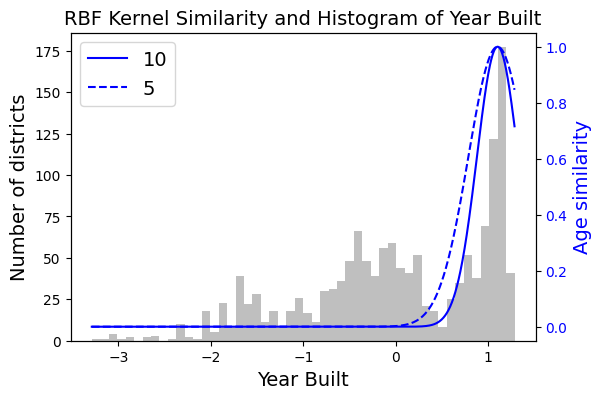

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Ustalanie wartości dla wieku budynków
ages = np.linspace(housing_train_processed_cleaned["num__YearBuilt"].min(),
                   housing_train_processed_cleaned["num__YearBuilt"].max(),
                   1000).reshape(-1, 1)

# Ustalanie wartości gamma
gamma1 = 10
gamma2 = 5

# Obliczanie jądra RBF dla różnych wartości gamma
rbf1 = rbf_kernel(ages, [[1.1]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[1.1]], gamma=gamma2)

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(6, 4))  # Ustalanie rozmiaru wykresu

# Wykres histogramu dla wieku budynków
ax1.set_xlabel("Year Built")
ax1.set_ylabel("Number of districts")
ax1.hist(housing_train_processed_cleaned["num__YearBuilt"], bins=50, alpha=0.5, color='gray', label='Districts Histogram')

# Tworzenie drugiej osi y
ax2 = ax1.twinx()  # Tworzenie współdzielonej osi x
color = "blue"
ax2.plot(ages, rbf1, color=color, label=gamma1)
ax2.plot(ages, rbf2, color=color, label=gamma2, linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

# Dodawanie legendy
plt.legend(loc="upper left")
plt.title("RBF Kernel Similarity and Histogram of Year Built")
plt.show()

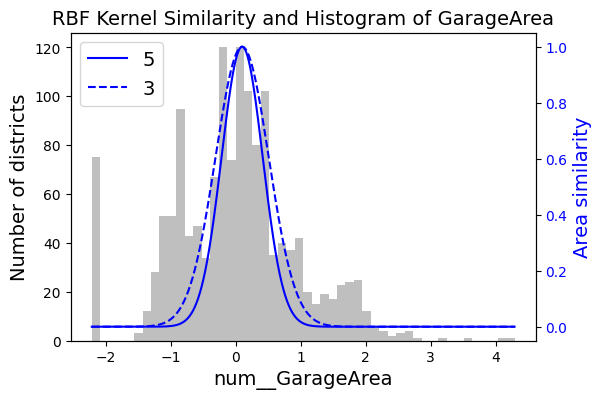

In [27]:
# Ustalanie wartości dla wieku budynków
ages = np.linspace(housing_train_processed_cleaned["num__GarageArea"].min(),
                   housing_train_processed_cleaned["num__GarageArea"].max(),
                   1000).reshape(-1, 1)

# Ustalanie wartości gamma
gamma1 = 5
gamma2 = 3

# Obliczanie jądra RBF dla różnych wartości gamma
rbf1 = rbf_kernel(ages, [[0.1]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[0.1]], gamma=gamma2)

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(6, 4))  # Ustalanie rozmiaru wykresu

# Wykres histogramu dla wieku budynków
ax1.set_xlabel("num__GarageArea")
ax1.set_ylabel("Number of districts")
ax1.hist(housing_train_processed_cleaned["num__GarageArea"], bins=50, alpha=0.5, color='gray', label='Districts Histogram')

# Tworzenie drugiej osi y
ax2 = ax1.twinx()  # Tworzenie współdzielonej osi x
color = "blue"
ax2.plot(ages, rbf1, color=color, label=gamma1)
ax2.plot(ages, rbf2, color=color, label=gamma2, linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Area similarity", color=color)

# Dodawanie legendy
plt.legend(loc="upper left")
plt.title("RBF Kernel Similarity and Histogram of GarageArea")
plt.show()

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel

ages = housing_train_processed_cleaned["num__YearBuilt"].values.reshape(-1, 1)
area = housing_train_processed_cleaned["num__GarageArea"].values.reshape(-1, 1)

rbf_values_year = rbf_kernel(ages, [[1.1]], gamma=10)
rbf_values_area = rbf_kernel(area, [[0.1]], gamma=5)

# Dodawanie nowej zmiennej RBF do DataFrame
housing_train_processed_cleaned['RBF_Kernel_YearBuild'] = rbf_values_year
housing_train_processed_cleaned['RBF_Kernel_GarageArea'] = rbf_values_area

housing_train_processed_cleaned.columns

Index(['num__OverallQual', 'num__GrLivArea', 'num__GarageArea',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__FullBath',
       'num__TotRmsAbvGrd', 'num__YearBuilt', 'num__YearRemodAdd',
       'num__GarageYrBlt', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__LotFrontage', 'num__LuxAddon', 'num__HalfBath',
       'num__KitchenAbvGr', 'num__SalePrice', 'onehot__MSZoning_FV',
       'onehot__MSZoning_RH', 'onehot__MSZoning_RL', 'onehot__MSZoning_RM',
       'onehot__Condition1_Feedr', 'onehot__Condition1_Norm',
       'onehot__Condition1_PosA', 'onehot__Condition1_PosN',
       'onehot__Condition1_RRAe', 'onehot__Condition1_RRAn',
       'onehot__Condition1_RRNe', 'onehot__Condition1_RRNn',
       'onehot__BldgType_2fmCon', 'onehot__BldgType_Duplex',
       'onehot__BldgType_Twnhs', 'onehot__BldgType_TwnhsE',
       'onehot__Electrical_FuseF', 'onehot__Electrical_FuseP',
       'onehot__Electrical_Mix', 'onehot__Electrical_SBrkr',
       'onehot__Electrical_None', 'onehot__Neig

## Train model and evaluate

In [29]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Model training and evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor(random_state=42),
    'ElasticNet': ElasticNet()
}

# Hyperparameter grid for additional models
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10]}
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]
}


In [30]:
results = {}  # To store evaluation results

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if model_name in ['Random Forest', 'Support Vector Regressor', 'XGBoost']:
        if model_name == 'Random Forest':
            param_grid = param_grid_rf
        elif model_name == 'Support Vector Regressor':
            param_grid = param_grid_svr
        elif model_name == 'XGBoost':
            param_grid = param_grid_xgb

        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(housing_train_processed_cleaned, y_train_cleaned)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        scores = cross_val_score(best_model, housing_train_processed_cleaned, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
    else:
        scores = cross_val_score(model, housing_train_processed_cleaned, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')

    mean_mse = -np.mean(scores)
    print(f"Mean CV MSE for {model_name}: {mean_mse}")
    results[model_name] = {'model': model if model_name not in locals() else best_model, 'mse': mean_mse}


Training Linear Regression...
Mean CV MSE for Linear Regression: 215.4792417992177
Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Mean CV MSE for Random Forest: 15012063.550793817
Training Support Vector Regressor...
Best parameters for Support Vector Regressor: {'C': 10, 'kernel': 'linear'}
Mean CV MSE for Support Vector Regressor: 1793475695.689588
Training XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean CV MSE for XGBoost: 38038605.0400505
Training ElasticNet...
Mean CV MSE for ElasticNet: 458796155.14061344


Test R2 for Linear Regression: 1.0
Test MSE for Linear Regression: 7.78170995923066e-21


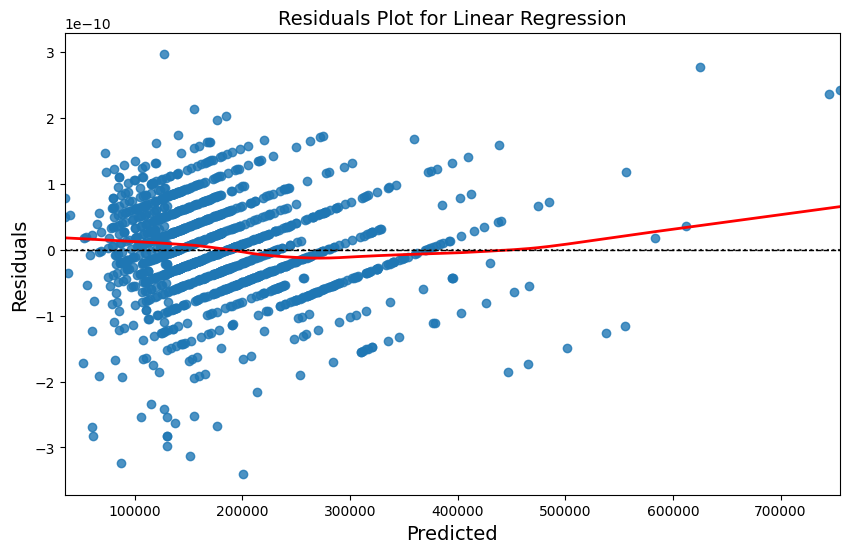

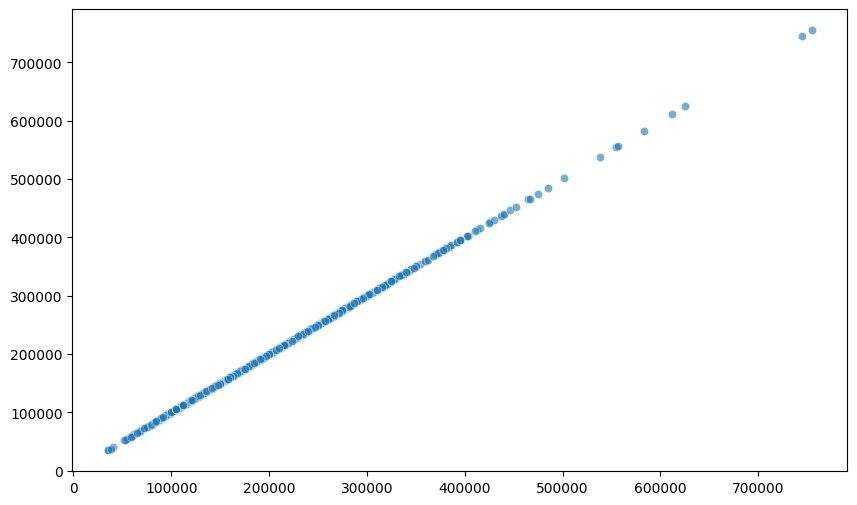

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

# Identify the best model based on the lowest MSE
best_model_name = min(results, key=lambda x: results[x]['mse'])
best_model = results[best_model_name]['model']

# Fit the best model to the training data
best_model.fit(housing_train_processed_cleaned, y_train_cleaned)

# Predict on the test set
y_pred = best_model.predict(housing_train_processed_cleaned)

# Calculate R2 and MSE on the test set
test_r2 = r2_score(y_train_cleaned, y_pred)
test_mse = mean_squared_error(y_train_cleaned, y_pred)
print(f"Test R2 for {best_model_name}: {test_r2}")
print(f"Test MSE for {best_model_name}: {test_mse}")

# Plot residuals (predicted vs true)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_train_cleaned - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title(f"Residuals Plot for {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Predicted vs True plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_cleaned, y=y_pred, alpha=0.6)
plt.show()